Project: Gene expression analysis of gill tissue from red king crab (_Paralithodes camtschaticus_) reared in varying pH conditions

In this first notebook I will record the steps taken to process RNASeq files from raw data to trimmed/filtered data that is ready for alignment. All steps will be conducted on Sedna, the high computing node. Locations of files, code, and scripts will be documented in this notebook.  

## Package version list 

- FastQC v0.11.9  
- multiqc, version 1.11  
- cutadapt, version 3.5  
- 

## Step 1:  Concatenate sequence data from same individual that was collected in different lanes

There are 43 libraries (from individual crab), which were each run in 7 lanes (each crab is identified by its Tank # and Crab #).  Therefore, sequencing data (paired reads) for the same crab was delivered to us from Univ. of Oregon in 7 separate files.  Giles concatenated the data by Tank#/Crab# using the following script: [concat_fastq_files.sh](https://raw.githubusercontent.com/laurahspencer/red-king_RNASeq-2022/main/scripts/concat_fastq_files.sh). Script location on Sedna: 'biodata/ggoetz/nichols/201910-redking_crab-rnaseq/scripts/concat_fastq_files.sh'

He then compressed the concatenated files using this script:  [compress_concat_files.sh](https://raw.githubusercontent.com/laurahspencer/red-king_RNASeq-2022/main/scripts/compress_concat_files.sh). Script location on Sedna: 'biodata/ggoetz/nichols/201910-redking_crab-rnaseq/scripts/compress_concat_files.sh'

He copied the concatenated/compressed data over to a new directory on Sedna, which is where I will retrieve the data for further processing: `share/nwfsc/ggoetz/red_king_crab/illumina/`

Here is a list of the concatenated sequence files: 

```
Tank_10_Crab_1_R1.fastq.gz  Tank_15_Crab_3_R1.fastq.gz  Tank_20_Crab_2_R1.fastq.gz  Tank_5_Crab_1_R1.fastq.gz
Tank_10_Crab_1_R2.fastq.gz  Tank_15_Crab_3_R2.fastq.gz  Tank_20_Crab_2_R2.fastq.gz  Tank_5_Crab_1_R2.fastq.gz
Tank_10_Crab_2_R1.fastq.gz  Tank_16_Crab_1_R1.fastq.gz  Tank_20_Crab_3_R1.fastq.gz  Tank_5_Crab_2_R1.fastq.gz
Tank_10_Crab_2_R2.fastq.gz  Tank_16_Crab_1_R2.fastq.gz  Tank_20_Crab_3_R2.fastq.gz  Tank_5_Crab_2_R2.fastq.gz
Tank_10_Crab_3_R1.fastq.gz  Tank_16_Crab_2_R1.fastq.gz  Tank_2_Crab_1_R1.fastq.gz   Tank_5_Crab_3_R1.fastq.gz
Tank_10_Crab_3_R2.fastq.gz  Tank_16_Crab_2_R2.fastq.gz  Tank_2_Crab_1_R2.fastq.gz   Tank_5_Crab_3_R2.fastq.gz
Tank_11_Crab_1_R1.fastq.gz  Tank_16_Crab_4_R1.fastq.gz  Tank_2_Crab_2_R1.fastq.gz   Tank_7_Crab_1_R1.fastq.gz
Tank_11_Crab_1_R2.fastq.gz  Tank_16_Crab_4_R2.fastq.gz  Tank_2_Crab_2_R2.fastq.gz   Tank_7_Crab_1_R2.fastq.gz
Tank_11_Crab_2_R1.fastq.gz  Tank_18_Crab_1_R1.fastq.gz  Tank_2_Crab_3_R1.fastq.gz   Tank_7_Crab_3_R1.fastq.gz
Tank_11_Crab_2_R2.fastq.gz  Tank_18_Crab_1_R2.fastq.gz  Tank_2_Crab_3_R2.fastq.gz   Tank_7_Crab_3_R2.fastq.gz
Tank_11_Crab_3_R1.fastq.gz  Tank_18_Crab_2_R1.fastq.gz  Tank_3_Crab_1_R1.fastq.gz   Tank_7_Crab_4_R1.fastq.gz
Tank_11_Crab_3_R2.fastq.gz  Tank_18_Crab_2_R2.fastq.gz  Tank_3_Crab_1_R2.fastq.gz   Tank_7_Crab_4_R2.fastq.gz
Tank_13_Crab_1_R1.fastq.gz  Tank_18_Crab_3_R1.fastq.gz  Tank_3_Crab_2_R1.fastq.gz   Tank_9_Crab_1_R1.fastq.gz
Tank_13_Crab_1_R2.fastq.gz  Tank_18_Crab_3_R2.fastq.gz  Tank_3_Crab_2_R2.fastq.gz   Tank_9_Crab_1_R2.fastq.gz
Tank_13_Crab_2_R1.fastq.gz  Tank_1_Crab_1_R1.fastq.gz   Tank_3_Crab_3_R1.fastq.gz   Tank_9_Crab_2_R1.fastq.gz
Tank_13_Crab_2_R2.fastq.gz  Tank_1_Crab_1_R2.fastq.gz   Tank_3_Crab_3_R2.fastq.gz   Tank_9_Crab_2_R2.fastq.gz
Tank_13_Crab_3_R1.fastq.gz  Tank_1_Crab_2_R1.fastq.gz   Tank_4_Crab_1_R1.fastq.gz   Tank_9_Crab_3_R1.fastq.gz
Tank_13_Crab_3_R2.fastq.gz  Tank_1_Crab_2_R2.fastq.gz   Tank_4_Crab_1_R2.fastq.gz   Tank_9_Crab_3_R2.fastq.gz
Tank_15_Crab_1_R1.fastq.gz  Tank_1_Crab_3_R1.fastq.gz   Tank_4_Crab_2_R1.fastq.gz   Tank_9_Crab_4_R1.fastq.gz
Tank_15_Crab_1_R2.fastq.gz  Tank_1_Crab_3_R2.fastq.gz   Tank_4_Crab_2_R2.fastq.gz   Tank_9_Crab_4_R2.fastq.gz
Tank_15_Crab_2_R1.fastq.gz  Tank_20_Crab_1_R1.fastq.gz  Tank_4_Crab_3_R1.fastq.gz
Tank_15_Crab_2_R2.fastq.gz  Tank_20_Crab_1_R2.fastq.gz  Tank_4_Crab_3_R2.fastq.gz
```

## Step 2: Assess quality of raw reads using FastQC/MultiQC



I wrote a slurm script to run `fastqc` and `multiqc` on all the raw (but concatenated) RNASeq data - [2021-12-13_fastqc-concat.sh](https://raw.githubusercontent.com/laurahspencer/red-king_RNASeq-2022/main/scripts/2021-12-13_fastqc-concat.sh)

I tried to rsync from my local computer to Sedna using the below command, but `rsync` isn't installed on Cygwin yet. (NOTE: the below rsync code hasn't yet been tested). 

`rsync --archive --progess --verbose --relative 2021-12-13_fastqc-concat.sh lspencer@sedna.nwfsc2.noaa.gov:/home/lspencer/2022-redking-OA/fastqc`

So, instead I created the script directly on Sedna using `touch 2021-12-13_fastqc-concat.sh` then opened the file using `nano 2021-12-13_fastqc-concat.sh`, and pasted contents from my clipboard using keys Shift+Insert. 

I executed the fastqc slurm script via `sbatch 2021-12-13_fastqc-concat.sh`

NOTE: to increase fastqc speed I added the argument `--thread 8` and set the number of CPUs to 8 in the SLURM header. 

Transferred MultiQC files over to my computer using `rsync`.  I used this code 
```
rsync --archive --progress --verbose --relative lspencer@sedna.nwfsc2.noaa.gov:/home/lspencer/2022-redking-OA/fastqc/concat/multiqc* .
```
BUT that transferred the entire file structure starting from my `home/` directory, so I need to fix the code to only transfer the files I want for next time. 

### MultiQC report on raw data
See below, or see here: [multiqc_report_raw.html](https://nbviewer.org/github/laurahspencer/red-king_RNASeq-2022/blob/main/results/fastqc/multiqc_report_raw.html)


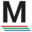
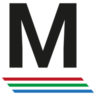
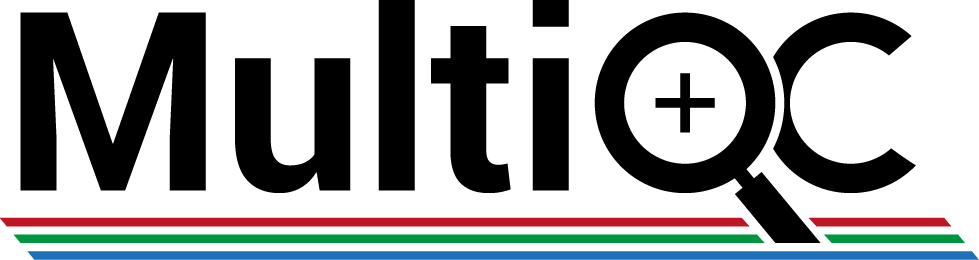
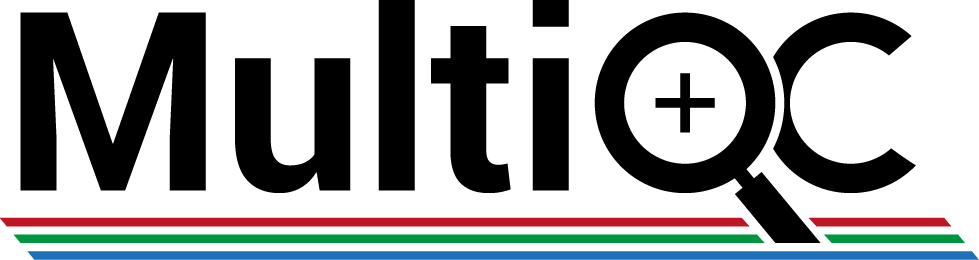
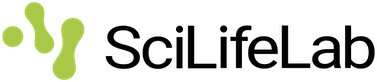

In [1]:
import IPython
IPython.display.HTML(filename='C:/Users/laura.spencer/Work/red-king_RNASeq-2022/results/fastqc/multiqc_report_raw.html')

## Step 3: Adapter trimming and quality filtering

I slightly modified code written by Giles to run Cutadapt on the raw sequence data, then run fastqc on the trimmed data. Script is [2021-12-14_trim.sh](https://raw.githubusercontent.com/laurahspencer/red-king_RNASeq-2022/main/scripts/2021-12-14_trim.sh), which I transferred to Sedna using 

```
rsync --archive --progress --verbose --relative 2021-12-14_trim.sh lspencer@sedna.nwfsc2.noaa.gov:/home/lspencer/2022-redking-OA/scripts/
```
When I first submitted the job I got the error 

```
sbatch: error: Batch script contains DOS line breaks (\r\n)
sbatch: error: instead of expected UNIX line breaks (\n).
```

which I fixed by running `dos2unix 2021-12-14_trim.sh` on Sedna. 

### MultiQC report on trimmed data: 

See below, or see a likely better rendering here: [multiqc_report_trimmed.html](https://nbviewer.org/github/laurahspencer/red-king_RNASeq-2022/blob/main/results/fastqc/multiqc_report_trimmed.html)


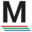
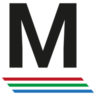
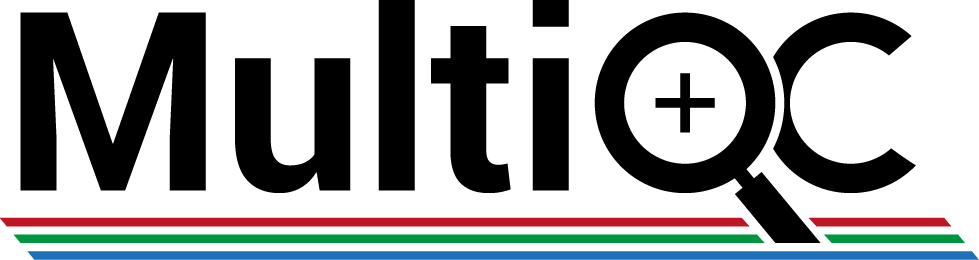
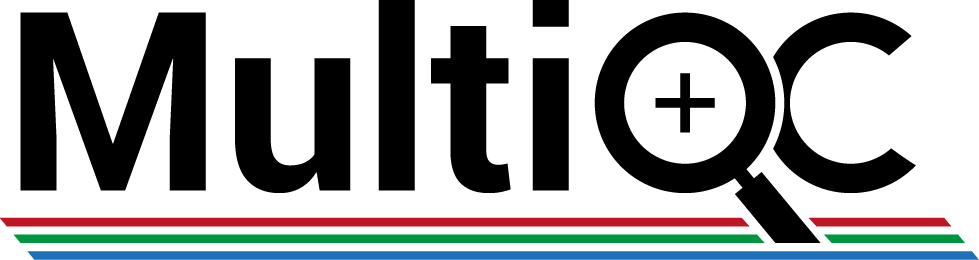
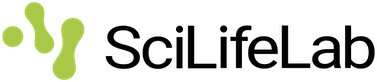

In [2]:
import IPython
IPython.display.HTML(filename='C:/Users/laura.spencer/Work/red-king_RNASeq-2022/results/fastqc/multiqc_report_trimmed.html')

I scanned through the cutadapt logs and interestingly it looks like 0.0% of reads were filtered due to low quality.  So, I re-ran the trimming script but with slightly more stringent quality filtering settings - phred scores of 20 and 15 for the 5' and 3' ends, respectively (as opposed to 15 and 10 in the previous trim).  

Transferred over all the cutadapt log files and fastqc and multiqc reports to my computer using rsync (this time not including all directories), e.g. using this from the desired save directory on my local computer terminal: ` rsync --archive --progress --verbose -t lspencer@sedna.nwfsc2.noaa.gov:/home/lspencer/2022-redking-OA/trimmed/*.v2.log .`.  

### _TO DO:  Pull summary statistics from cutadapt logs like Giles did in google spreadsheet - compare results with v1 and v2 settings, and to Giles' run._

(FYI for now I can't get Jupyter Notebook to run bash, so I am running things in my Cygwin terminal and documenting here.)

Combined all cutadapt log files from v2 trimming: `cat *.v2.log >> cutadapt-all-v2.log`  
Then looked at the % quality-trimmed and total % written (passing all requirements)

#### With the new quality filtering settings 0.2% were quality-trimmed from each sample. 

```
$ grep "Quality-trimmed" cutadapt-all-v2.log
Quality-trimmed:              28,815,249 bp (0.2%)
Quality-trimmed:              22,616,457 bp (0.2%)
Quality-trimmed:              25,328,632 bp (0.2%)
Quality-trimmed:              21,296,397 bp (0.2%)
Quality-trimmed:              24,069,543 bp (0.2%)
Quality-trimmed:              30,570,740 bp (0.2%)
Quality-trimmed:              30,509,320 bp (0.2%)
Quality-trimmed:              30,421,609 bp (0.2%)
Quality-trimmed:              27,050,106 bp (0.2%)
Quality-trimmed:              19,857,325 bp (0.2%)
Quality-trimmed:              19,130,383 bp (0.2%)
Quality-trimmed:              26,732,086 bp (0.2%)
Quality-trimmed:              25,526,005 bp (0.2%)
Quality-trimmed:              21,944,063 bp (0.2%)
Quality-trimmed:              19,400,453 bp (0.2%)
Quality-trimmed:              22,607,898 bp (0.2%)
Quality-trimmed:              12,185,944 bp (0.2%)
Quality-trimmed:              26,419,927 bp (0.2%)
Quality-trimmed:              18,710,606 bp (0.2%)
Quality-trimmed:              15,939,404 bp (0.2%)
Quality-trimmed:              17,422,504 bp (0.2%)
Quality-trimmed:              22,131,662 bp (0.2%)
Quality-trimmed:              31,911,362 bp (0.2%)
Quality-trimmed:              19,054,759 bp (0.2%)
Quality-trimmed:              17,995,312 bp (0.2%)
Quality-trimmed:              20,249,517 bp (0.2%)
Quality-trimmed:              17,051,791 bp (0.2%)
Quality-trimmed:              15,069,523 bp (0.2%)
Quality-trimmed:              17,906,078 bp (0.2%)
Quality-trimmed:              24,460,591 bp (0.2%)
Quality-trimmed:              23,420,769 bp (0.2%)
Quality-trimmed:              23,910,912 bp (0.2%)
Quality-trimmed:              25,367,958 bp (0.2%)
Quality-trimmed:              25,627,333 bp (0.2%)
Quality-trimmed:              23,812,062 bp (0.2%)
Quality-trimmed:              25,800,671 bp (0.2%)
Quality-trimmed:              18,235,766 bp (0.2%)
Quality-trimmed:              17,745,916 bp (0.2%)
Quality-trimmed:              19,675,725 bp (0.2%)
Quality-trimmed:              30,842,775 bp (0.2%)
Quality-trimmed:              19,437,120 bp (0.2%)
Quality-trimmed:              26,407,586 bp (0.2%)
Quality-trimmed:              19,296,825 bp (0.2%)
```

#### And between 97.7% - 99.1% were written 
```
grep "Total written (filtered)" cutadapt-all-v2.log
Total written (filtered):  14,745,699,531 bp (98.7%)
Total written (filtered):  12,193,280,150 bp (97.7%)
Total written (filtered):  13,831,265,209 bp (98.4%)
Total written (filtered):  11,069,778,596 bp (98.8%)
Total written (filtered):  12,812,486,062 bp (98.9%)
Total written (filtered):  16,689,301,048 bp (98.9%)
Total written (filtered):  16,237,990,048 bp (98.9%)
Total written (filtered):  15,691,181,344 bp (98.8%)
Total written (filtered):  14,313,627,377 bp (98.7%)
Total written (filtered):  10,667,024,432 bp (98.9%)
Total written (filtered):  10,294,345,382 bp (98.7%)
Total written (filtered):  14,081,731,805 bp (98.9%)
Total written (filtered):  13,865,255,682 bp (98.7%)
Total written (filtered):  11,208,599,703 bp (98.9%)
Total written (filtered):  10,801,539,581 bp (98.7%)
Total written (filtered):  11,176,514,361 bp (98.9%)
Total written (filtered):  6,800,886,582 bp (98.6%)
Total written (filtered):  14,623,214,930 bp (98.8%)
Total written (filtered):  10,698,738,382 bp (98.3%)
Total written (filtered):  9,427,768,781 bp (98.7%)
Total written (filtered):  10,420,783,805 bp (98.4%)
Total written (filtered):  12,064,088,125 bp (98.7%)
Total written (filtered):  15,796,385,093 bp (98.9%)
Total written (filtered):  10,334,963,735 bp (98.7%)
Total written (filtered):  10,938,435,841 bp (98.2%)
Total written (filtered):  12,913,222,273 bp (98.2%)
Total written (filtered):  9,773,628,253 bp (97.9%)
Total written (filtered):  9,838,889,889 bp (98.0%)
Total written (filtered):  10,884,193,575 bp (97.7%)
Total written (filtered):  12,958,822,526 bp (98.7%)
Total written (filtered):  12,456,983,455 bp (98.6%)
Total written (filtered):  12,534,973,072 bp (98.7%)
Total written (filtered):  13,402,147,470 bp (98.7%)
Total written (filtered):  13,614,694,286 bp (98.7%)
Total written (filtered):  12,058,601,230 bp (99.1%)
Total written (filtered):  12,314,669,817 bp (98.6%)
Total written (filtered):  10,410,451,935 bp (98.5%)
Total written (filtered):  11,039,751,253 bp (98.7%)
Total written (filtered):  12,104,698,054 bp (98.8%)
Total written (filtered):  16,135,368,900 bp (98.8%)
Total written (filtered):  10,238,532,627 bp (98.8%)
Total written (filtered):  14,814,742,323 bp (98.8%)
Total written (filtered):  11,216,116,921 bp (98.7%)
```



## Step 4: Align reads to Blue king crab genome 

I downloaded the Blue king crab ([accession no. PRJNA555178](https://www.ncbi.nlm.nih.gov/assembly/GCA_013283005.1)) genome from NCBI, moved the file to my /references folder. It's archived in the .tar format, so I un-tarred it

In [34]:
# Move to /references folder, or make sure i'm already located there 
pwd

'C:\\Users\\laura.spencer\\Work\\red-king_RNASeq-2022\\references'

In [35]:
! tar -xvf genome_assemblies_genome_fasta.tar

x ncbi-genomes-2021-12-22/GCA_013283005.1_ASM1328300v1_genomic.fna.gz
x ncbi-genomes-2021-12-22/md5checksums.txt
x ncbi-genomes-2021-12-22/README.txt
x report.txt


This created a new directory called "ncbi-genomes-2021-12-22/" with the following contents: 

- GCA_013283005.1_ASM1328300v1_genomic.fna.gz  
- README.txt  
- md5checksums.txt  

My computer's bash terminal (Cygwin) doesn't have md5 installed, nor can I run anything here on Jupyter, so I'm going to transfer the genome and md5 file over to Sedna, then double check the genome file fidelity. 

```
rsync --archive --progress --verbose -t GCA_013283005.1_ASM1328300v1_genomic.fna.gz lspencer@sedna.nwfsc2.noaa.gov:/home/lspencer/references/bluekingcrab/

rsync --archive --progress --verbose -t md5checksums.txt lspencer@sedna.nwfsc2.noaa.gov:/home/lspencer/references/bluekingcrab/

rsync --archive --progress --verbose -t README.txt lspencer@sedna.nwfsc2.noaa.gov:/home/lspencer/references/bluekingcrab/
```

I compared the md5 checksum of the genome file on Sedna to what was listed in the md5.txt file downloaded alongside the genome. Looks good. 

40aec7b1c295cef41026f1e5e1b545b6  GCA_013283005.1_ASM1328300v1_genomic.fna.gz - _On Sedna (using `md5sum <file.fna.gz>`_   
40aec7b1c295cef41026f1e5e1b545b6  GCA_013283005.1_ASM1328300v1_genomic.fna.gz - _In .txt file (using `cat <file.txt>`_  

Wrote a slurm script to 1) build a bowtie2 index for the blue king crab genome, and 2) align reads to that genome using that index. Script is [2021-12-21_align.sh](https://raw.githubusercontent.com/laurahspencer/red-king_RNASeq-2022/main/scripts/2021-12-21_align.sh), but I also paste it here with some notes: 

```
#!/bin/bash

#SBATCH --job-name=redking_align-v1
#SBATCH --output=/home/lspencer/2022-redking-OA/sbatch_logs/redking_align-v1.txt
#SBATCH --mail-user=laura.spencer@noaa.gov
#SBATCH --mail-type=ALL
#SBATCH -c 16 # <--- opted for 16 cores, not sure if this is appropriate (should I have used 10 or 20?)  
#SBATCH -t 10-0:0:0 

# This script is for aligning trimmed RNA-Seq data to the blue king crab genome

#source /home/lspencer/venv/bin/activate
module load aligners/bowtie2/2.4.2

REF=/home/lspencer/references/bluekingcrab
IN=/home/lspencer/2022-redking-OA/trimmed
OUT=/scratch/lspencer/2022-redking-OA/aligned-bowtie
VER=1

# Move to the directory containing blue king crab genome.
# Bowtie2 looks for index in current directory - easier just to be in it.
cd ${REF}

### Create bowtie2 index for blue king crab genome
bowtie2-build \
--large-index \ # <--- Was required to include this, as the index building didn't work w/o it 
-f GCA_013283005.1_ASM1328300v1_genomic.fna.gz \
Paralithodes_platypus # <--- this will be the base name of all the genome index files  

# Run Bowtie2 over each RNASeq paired sample
for file in ${IN}/*.trimmed.R1.v2.fastq.gz
do
sample="$(basename -a ${file} | cut -d "." -f 1)"
file_R1="${sample}.trimmed.R1.v2.fastq.gz"
file_R2="${sample}.trimmed.R2.v2.fastq.gz"
map_file="${sample}.bowtie.sam" # <--- FYI this map_file should include version #, like this: "${sample}.bowtie.v${VER}.sam"  

# run Bowtie2 on each file
bowtie2 \
-x Paralithodes_platypus \
--sensitive \ # <--- I opted for this pre-set option 
--threads 16 \
--no-unal \ # <--- don't print unaligned reads to .bam files  
-1 ${IN}/${file_R1} \
-2 ${IN}/${file_R2} \
-S ${OUT}/${map_file}.v${VER}; \ # <--- FYI this is incorrect. Remove the "{VER}" from here.  
done >> ${OUT}/bowtieout.v${VER}.txt 2>&1
```

### Results of alignment with Bowtie2 and blue king crab genome

The alingment finished after a few days. Looks pretty good!  Here's the resulting total alignment rates (also available in this output file [bowtieout.v1.txt](https://raw.githubusercontent.com/laurahspencer/red-king_RNASeq-2022/main/results/bowtie/bowtieout.v1.txt): 

```
$ grep "overall alignment rate" bowtieout.v1.txt
76.41% overall alignment rate
76.00% overall alignment rate
78.09% overall alignment rate
81.15% overall alignment rate
80.07% overall alignment rate
75.74% overall alignment rate
75.49% overall alignment rate
81.26% overall alignment rate
80.86% overall alignment rate
79.83% overall alignment rate
76.53% overall alignment rate
79.77% overall alignment rate
79.78% overall alignment rate
79.53% overall alignment rate
79.46% overall alignment rate
74.20% overall alignment rate
76.45% overall alignment rate
78.98% overall alignment rate
77.02% overall alignment rate
76.40% overall alignment rate
76.68% overall alignment rate
79.20% overall alignment rate
80.37% overall alignment rate
79.52% overall alignment rate
77.04% overall alignment rate
79.87% overall alignment rate
78.71% overall alignment rate
77.16% overall alignment rate
79.80% overall alignment rate
79.60% overall alignment rate
80.92% overall alignment rate
80.08% overall alignment rate
79.52% overall alignment rate
80.59% overall alignment rate
78.62% overall alignment rate
78.96% overall alignment rate
80.44% overall alignment rate
76.42% overall alignment rate
77.73% overall alignment rate
78.48% overall alignment rate
77.74% overall alignment rate
73.77% overall alignment rate
78.86% overall alignment rate
```

**Average alignment = 78.44% +/- 1.9 (SD)**  
**Alignment range = 73.77% - 81.26%**

## Step 5: Convert .sam to .bam & sort 

I wrote a slurm script to do this using samtools: [2021-12-30_sort-deduplicate.sh](https://raw.githubusercontent.com/laurahspencer/red-king_RNASeq-2022/main/scripts/2021-12-30_sort-deduplicate.sh)  

This sorted the alignment files by coordinate. To double check I viewed the header line in one of the .sorted.bam files; the "SO:coordinate" indicates it was indeed sorted by coordinate (and not name):  
```
$ samtools view -H Tank_20_Crab_3.sorted.bam | grep "@HD"
@HD     VN:1.0  SO:coordinate
```


## Step 6: Deduplicate reads (optional)

Here I will use the Picard tool w/n the gatk tool library to deduplicate (since I will probably use that program toa also identify SNPs). This is an optional step, but I'd like to compare the expression differences among pH when deduplicating / not deduplicating. 
This was performed after sorting/converting to bam files in the previous script (above, see "2021-12-30_sort_dedupliate.sh").

The `gatk MarkDuplicates` found an average duplication rate of 31.3% across all samples; here's the duplication rate for each sample. Seems way too high - I'll explore the non-duplicated data in IGV and see if many reads indeed align at exactly same place - if so, duplication could be necessary. BUT at this point, I'll move forward with the non-deduplicated .bam files.   

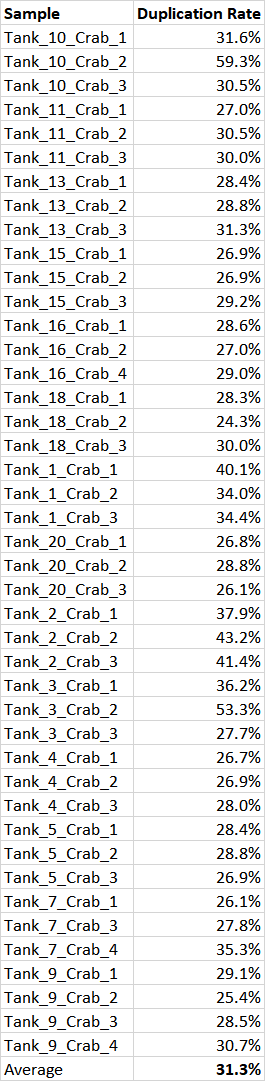



## Step 7:  Generate gene counts 

I will use `featureCounts` on aligned reads (from Bowtie2) to count the number of reads that uniquely map to each gene. This requires a feature file, which I received(!) from the folks who published the blue king crab genome in [Tang et al. 2020](https://doi.org/10.1111/1755-0998.13266). There are two files: 
- [EVM.out_new.gff3.gz](https://github.com/laurahspencer/red-king_RNASeq-2022/blob/main/references/EVM.out_new.gff3?raw=true): locations of mRNA, coding sequences, genes, and exons  
- [EVM.out_new.cds.gz](https://github.com/laurahspencer/red-king_RNASeq-2022/blob/main/references/EVM.out_new.cds.gz?raw=true): just coding sequences   

They are also saved on Sedna here: /home/lspencer/references/bluekingcrab/

## HICCUP 
The annotation files use the blue king crab genome version published on Dryad, but I used the version published on NCBI when aligning. They have different chromosome & scaffold IDs. I will see if I can translate between the two, but probably will need to re-align to the Dryad version (safest option to not make coordinate errors)

### Here I compare the chromosome/scaffold IDs in the NCBI and Dryad versions of the genome, and make a 

The genome I used (from NCBI) uses a mix of sequence IDs:

Chromosomes 1 - 104: 
```
>CM023253.1 Paralithodes platypus isolate Beidaihe-2018 chromosome 1, whole genome shotgun sequence
...
>CM023316.1 Paralithodes platypus isolate Beidaihe-2018 chromosome 104, whole genome shotgun sequence
```

HiC_scaffold_105 - HiC_scaffold_6958:  
```
>JABTEM010000105.1 Paralithodes platypus isolate Beidaihe-2018 HiC_scaffold_105, whole genome shotgun sequence
... 
>JABTEM010006958.1 Paralithodes platypus isolate Beidaihe-2018 HiC_scaffold_6958, whole genome shotgun sequence
```

The genome from Dryad (that is linked to the feature files) uses sequence IDs `>HiC_scaffold_1` up to `>HiC_scaffold_6958`. 

The .gff file uses the IDs `HiC_scaffold_#` and indicates that features mostly reside on scaffolds 1-104 (e.g. "HiC_scaffold_97"), but there _are_ a few on scaffolds >104.   

```
HiC_scaffold_97	EVM	gene	13844919	13845698	.	+	.	ID=evm.TU.HiC_scaffold_97.1;Name=EVM%20prediction%20HiC_scaffold_97.1
HiC_scaffold_97	EVM	mRNA	13844919	13845698	.	+	.	ID=evm.model.HiC_scaffold_97.1;Parent=evm.TU.HiC_scaffold_97.1;Name=EVM%20prediction%20HiC_scaffold_97.1
```

From Tang et al. 2020 the assembly has 104 chromosomes, consisting of 6,958 scaffolds. So, theoretically if the genome .fasta files contained both the chromosome and scaffold sequences, it should contain 104 + 6,958 = 7,062 sequences (which it doesn't). I measured the size of each sequence in the Dryad genome using these scripts:
```
# Count length of each sequence in fasta 
$ awk '/^>/ {if (seqlen){print seqlen}; print ;seqlen=0;next; } { seqlen += length($0)}END{print seqlen}' Paralithodes_platypus_genome.fasta > P.platypus_lengths.txt

>HiC_scaffold_1
32147953
>HiC_scaffold_2
57681488
>HiC_scaffold_3
37211842
>HiC_scaffold_4
51153954

# Move lengths to new column 
awk '{printf "%s%s",$0,NR%2?"\t":RS}' P.platypus_lengths.txt > P.platypus_lengths_tab.txt

>HiC_scaffold_1	32147953
>HiC_scaffold_2	57681488
>HiC_scaffold_3	37211842
>HiC_scaffold_4	51153954
```

I used R to summarize the lengths of the scaffolds.

Scaffolds 1-104 ranged from 9,172,410bp - 92,160,374bp (mean 45,086,255bp). All 104 "scaffolds" (chromosomes?) contain at least 1 feature. 

Scaffolds 105+ ranged from 694bp - 5,845,776bp (mean 16,954bp). Only 252 scaffolds (of the 6,854) contain at least 1 feature.  

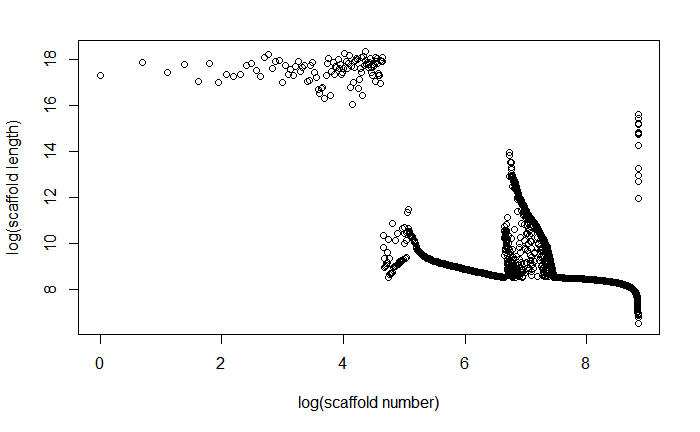

I emailed the authors to understand the identities of scaffolds 105+. 

## Step 4 - Redo: Re-align to other version of blue crab genome 

I transferred the blue king crab genome that I downloaded from [Dryad](https://datadryad.org/stash/dataset/doi:10.5061/dryad.jm63xsj6c) (file = Paralithodes_platypus_genome.fasta.gz) over to Sedna in my /home/lspencer/references/bluekingcrab/ directory.  I then modified my alignment slurm script to re-align the data trimmed data.  Here's the alignment script: [2022-01-03_align.sh](https://raw.githubusercontent.com/laurahspencer/red-king_RNASeq-2022/main/scripts/2022-01-03_align.sh). NOTE: the resulting .sam files are saved here: /scratch/lspencer/2022-redking-OA/aligned-bowtie/ and have the format "Tank_10_Crab_1.bowtie.v2.sam"

```
76.41% overall alignment rate
76.00% overall alignment rate
78.09% overall alignment rate
81.15% overall alignment rate
80.07% overall alignment rate
75.74% overall alignment rate
75.49% overall alignment rate
81.26% overall alignment rate
80.86% overall alignment rate
79.83% overall alignment rate
76.53% overall alignment rate
79.77% overall alignment rate
79.78% overall alignment rate
79.53% overall alignment rate
79.46% overall alignment rate
74.20% overall alignment rate
76.45% overall alignment rate
78.98% overall alignment rate
77.02% overall alignment rate
76.40% overall alignment rate
76.68% overall alignment rate
79.20% overall alignment rate
80.37% overall alignment rate
79.52% overall alignment rate
77.04% overall alignment rate
79.87% overall alignment rate
78.71% overall alignment rate
77.16% overall alignment rate
79.80% overall alignment rate
79.60% overall alignment rate
80.92% overall alignment rate
80.08% overall alignment rate
79.52% overall alignment rate
80.59% overall alignment rate
78.62% overall alignment rate
78.96% overall alignment rate
80.44% overall alignment rate
76.42% overall alignment rate
77.73% overall alignment rate
78.48% overall alignment rate
77.74% overall alignment rate
73.77% overall alignment rate
78.86% overall alignment rate
```

## Helpful bash commands 

- To return a list of samples in order that they appear in a directory (here I search for all files ending in ".sorted.bam"): 
```
basename -a *.sorted.bam | cut -d "." -f 1  
```

- To return a specific row in several text files (the row begins with the string "Unknown"), then calculate the average of a specific column (here I average column 10, which is the duplication rate):  
```
grep "Unknown" *.dup_metrics.txt | awk '{ total += $10; count++ } END { print total/count }'
```

- Path to my Work directory via Cygwin:  `/cygdrive/c/Documents and Settings/laura.spencer/Work/`

- Check size of directory: `du -hs <directory>`
